In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
from functions import get_dyn_v2, get_prop_abs_v2, create_R_v1, get_var_hist,simulate_traj,get_prop_abs, create_R, get_theo_var_l, get_x2_var
from setup import setup_matplotlib
#from scipy.linalg import expm
#from scipy.sparse import csr_array, coo_array
from scipy.optimize import curve_fit
from pathlib import Path

setup_matplotlib()

np.random.seed(42)

In [3]:
all_data = {}
for filepath in (Path.cwd()/'nummeric_results/').glob('cusp_rate_s*.pkl'):
    s = float(filepath.stem.split('cusp_rate_s')[1])
    all_data[s] = pickle.loads(open(filepath, 'rb').read())

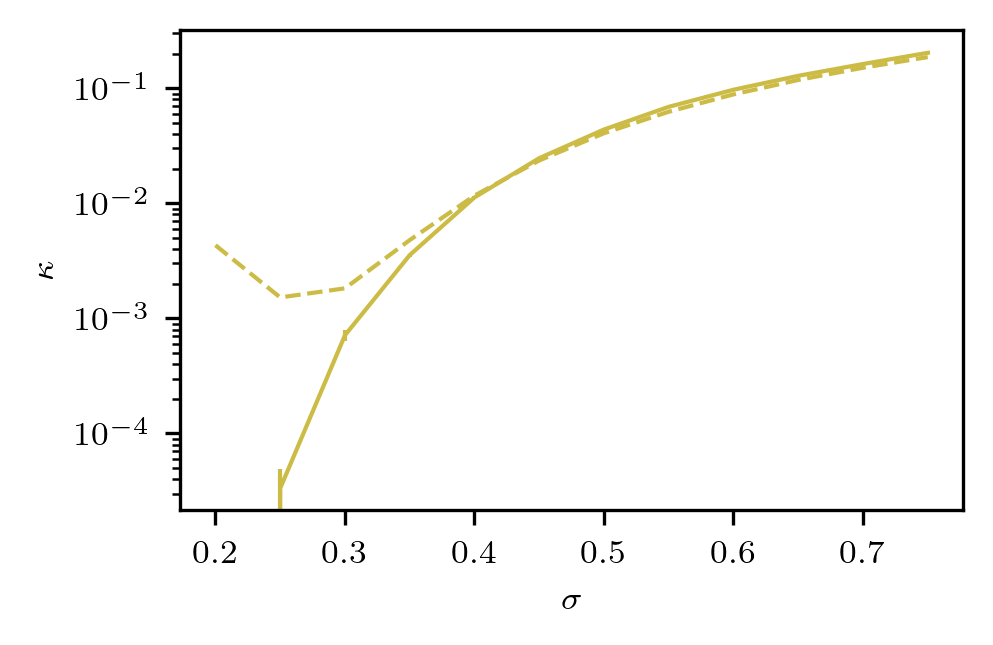

In [8]:
#tau = 1.4
s = np.sort(list(all_data.keys()))
taus = all_data[s[0]]['ltaus']
#tau_is = range(0,len(taus),2)
tau_is = [3]
for tau_i  in tau_is:
    tau = taus[tau_i]
    num_rates = np.stack([all_data[i]['num_rates'][tau_i] for i in s])
    sim_rates = np.stack([all_data[i]['sim_rates'][tau_i] for i in s])

    plt.errorbar(s, *sim_rates.T, c= f'C{tau_i}')
    plt.errorbar(s, *num_rates.T, ls = '--', c= f'C{tau_i}')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\kappa$')
plt.yscale('log')
#plt.ylim(1e-4,0.5e0)